---
title: Improving your plots in Python
author: Ian Hough, Jennie Thomas
date: 2025-05-15
---

In [1]:
%load_ext watermark

import netCDF4  # to open data file for map example
import numpy as np
import seaborn as sns
import xarray as xr
from cartopy import crs as ccrs
from matplotlib import pyplot as plt

%watermark --iversions

xarray    : 2025.4.0
netCDF4   : 1.7.2
numpy     : 2.2.5
matplotlib: 3.10.3
cartopy   : 0.24.0
seaborn   : 0.13.2



Example plots
=============


These examples are mostly taken from the blog post ["How to Create Professional and Readable Scientific Plots in Python"](https://medium.com/@FilipeBorgesBR/how-to-create-professional-and-readable-scientific-plots-in-python-72f1defed8b3) and the [Python Graph Gallery](https://python-graph-gallery.com/). The idea is to practice customizing some basic plots so that you can later apply the principles to your own plots.

Line plot / timeseries
----------------------

### Basic plot

Here's a basic [matplotlib]() plot of noisy sine + cosine waves:

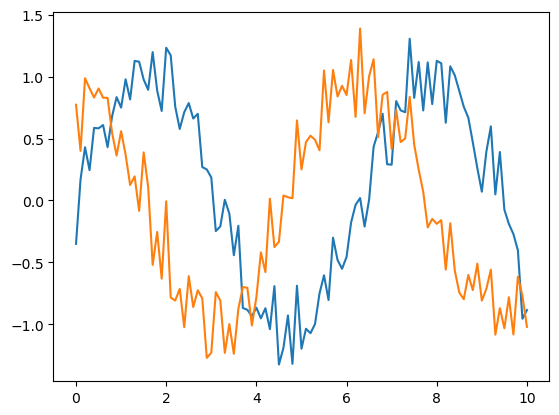

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Generate an array of x values from 0 to 10 with a step of 0.1
x = np.arange(0, 10.1, 0.1)

# Compute the sine and cosine values for each x
y1 = np.sin(x)
y2 = np.cos(x)

# Add random noise
np.random.seed(100)
noise_amplitude = 0.2
y1_noisy = y1 + noise_amplitude * np.random.randn(len(y1))
y2_noisy = y2 + noise_amplitude * np.random.randn(len(y2))

# Create a new figure for the plot
plt.figure()

# Plot the sine and cosine curves
plt.plot(x, y1_noisy)
plt.plot(x, y2_noisy)

# Show the figure
plt.show()

How might we improve this plot?

### Customized

Here we adjust font sizes and add axis labels, a legend, and a title.

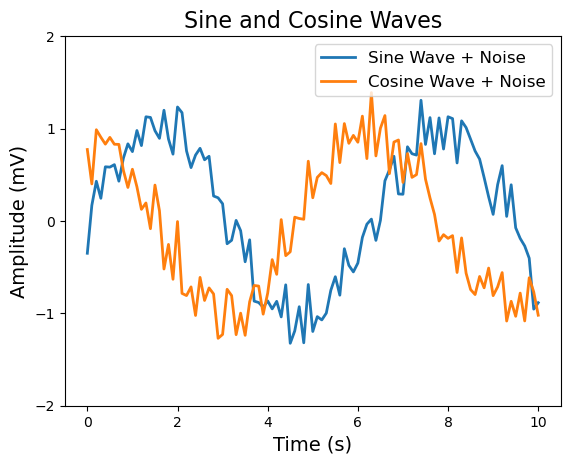

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Generate an array of x values from 0 to 10 with a step of 0.1
x = np.arange(0, 10.1, 0.1)

# Compute the sine and cosine values for each x
y1 = np.sin(x)
y2 = np.cos(x)

# Add random noise
np.random.seed(100)
noise_amplitude = 0.2
y1_noisy = y1 + noise_amplitude * np.random.randn(len(y1))
y2_noisy = y2 + noise_amplitude * np.random.randn(len(y2))

# Create a new figure for the plot
plt.figure()

# Plot the sine and cosine curves with labels for the legend
plt.plot(x, y1_noisy, "-", linewidth=2, label="Sine Wave + Noise")
plt.plot(x, y2_noisy, "-", linewidth=2, label="Cosine Wave + Noise")

# Set the plot title and axis labels with larger fonts for better readability
plt.title("Sine and Cosine Waves", fontsize=16)
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Amplitude (mV)", fontsize=14)

# Symmetric Y-axis for balanced visual perception
plt.ylim([-2, 2])
plt.yticks(np.arange(-2, 2.1, 1))

# Add legend
plt.legend(loc="upper right", fontsize=12)

# Show the figure
plt.show()

How could this plot be further improved?

Scatterplot
-----------

### Basic

Here's a basic scatterplot showing two variables from the [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) dataset. This plot uses [seaborn](https://seaborn.pydata.org/) to automate some tasks (assigning colors, adding a legend) but the output is a matplotlib object:

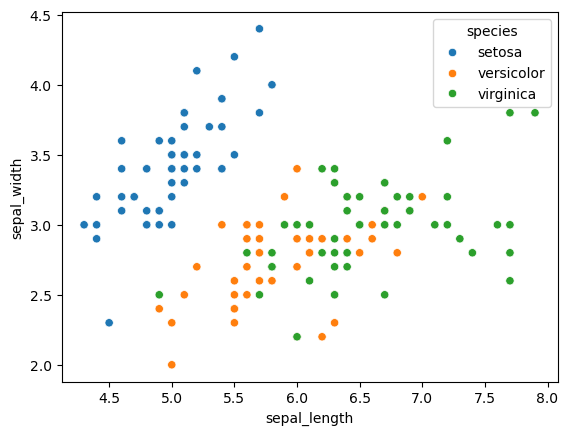

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

# Load the 'Iris' dataset
iris = sns.load_dataset('iris')

sns.scatterplot(
   x="sepal_length",
   y="sepal_width",
   data=iris,
   hue='species',  # Use a different color for each species
)

plt.show()

How might we improve this plot?

### Customized

Here we modify the axis labels and legend text, use different markers as well as colors to distinguish the species, and use semi-transparent markers to show markers that overlie each other.

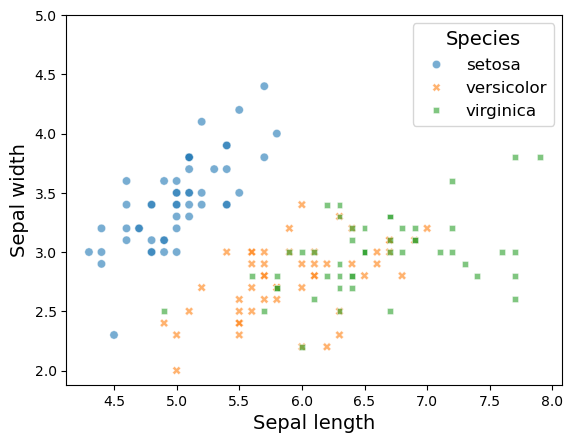

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt

# Load the 'Iris' dataset
iris = sns.load_dataset("iris")

ax = sns.scatterplot(
    x="sepal_length",
    y="sepal_width",
    data=iris,
    hue="species",  # Use a different color for each species
    style="species",  # Use a different marker for each species
    alpha=0.6,  # Semi-transparent markers to show overlap
)

# Increase y-axis max to give more space for legend
ax.set_ylim(None, 5)

# Adjust axis labels and font size
ax.set_xlabel("Sepal length", fontsize=14)
ax.set_ylabel("Sepal width", fontsize=14)

# Adjust legend title and font size
plt.legend(title="Species", title_fontsize=14, fontsize=12)

plt.show()

How could this plot be further improved?

Map (geospatial data)
---------------------

### Basic

Here's a basic map of [GHCN CAMS](https://psl.noaa.gov/data/gridded/data.ghcncams.html) long-term (1991-2020) monthly mean 2m air temperature for Jan, Apr, Jul, and Oct. This plot uses [xarray's `plot` method](https://docs.xarray.dev/en/stable/user-guide/plotting.html) but again the output is a matplotlib object:

/var/folders/16/fs9y3x3d15zc6c5y8k3bgp4w0000gp/T/ipykernel_88201/3964958689.py:6: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates prior reform date (1582-10-15). To silence this warning specify 'use_cftime=True'.
  t2m = xr.open_dataset("data/air.mon.ltm.1991-2020.nc")
/var/folders/16/fs9y3x3d15zc6c5y8k3bgp4w0000gp/T/ipykernel_88201/3964958689.py:6: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates prior reform date (1582-10-15). To silence this warning specify 'use_cftime=True'.
  t2m = xr.open_dataset("data/air.mon.ltm.1991-2020.nc")


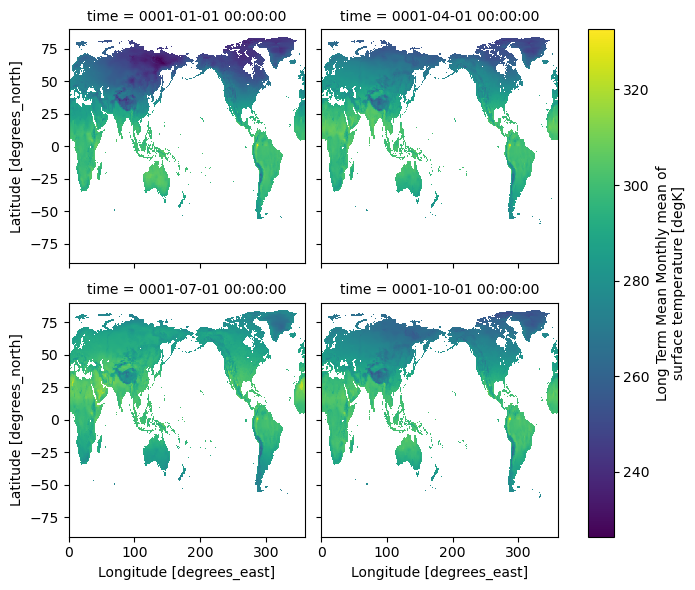

In [6]:
import netCDF4  # needed to open data file
import xarray as xr
from matplotlib import pyplot as plt

# Load data
t2m = xr.open_dataset("data/air.mon.ltm.1991-2020.nc")

# Plot Jan, Apr, Jul, Oct
t2m["air"].isel(time=range(0, 12, 3)).plot.pcolormesh(
    col="time",  # Show each month as a subplot
    col_wrap=2,  # Make a 2 x 2 grid of subplots
)

plt.show()

How might we improve this plot?

### Customized

Here we use the Hammer global equal-area projection and a colorblind-friendly diverging colormap that evokes "cold" and "hot".

How could this plot be further improved?

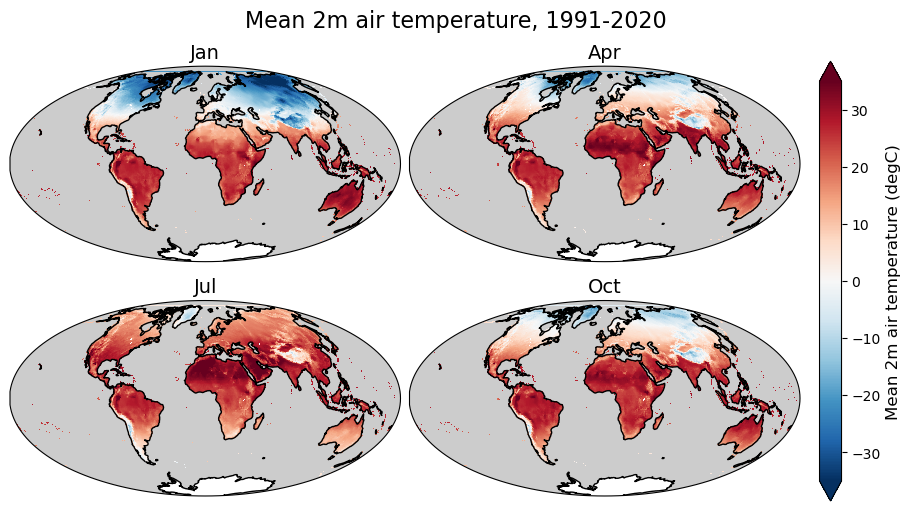

In [7]:
import cftime  # needed to decode time coordinates
import netCDF4  # needed to open data file
import xarray as xr
from cartopy import crs as ccrs
from cartopy.feature import OCEAN
from matplotlib import pyplot as plt

# Load data
t2m = xr.open_dataset("data/air.mon.ltm.1991-2020.nc", decode_times=False)

# Select Jan, Apr, Jul, Oct
# Use month abbreviations for the time dimension labels
plot_data = (
    t2m["air"].isel(time=range(0, 12, 3)).assign_coords(time=["Jan", "Apr", "Jul", "Oct"])
)
plot_data = (plot_data - 273.15).assign_attrs(t2m["air"].attrs)

# Plot
grid = plot_data.plot.pcolormesh(
    x="lon",
    y="lat",
    # Make a subplot for each month
    col="time",
    # Arrange subplots in a grid with 2 columns
    col_wrap=2,
    # Increase figure width and height
    figsize=(9, 5),
    # Use a Hammer equal-area projection
    subplot_kws={"projection": ccrs.Hammer()},
    # Data coordinates are lat/lon i.e. PlateCarree
    transform=ccrs.PlateCarree(),
    # Don't use automatic colorbar as it is incompatible with constrained layout
    add_colorbar=False,
    # Don't use automatic labels as they include dimension name e.g. "time = Jan"
    add_labels=False,
    # Use Colorbrewer's Blue - White - Red colormap
    cmap="RdBu_r",
    # Set colormap range for all subplots (center at 0, extend to ~1st, ~99th percentile)
    vmin=-35,
    vmax=35,
)

# Use constrained layout; tight layout packs plot elements too close to each other
grid.fig.set_constrained_layout(True)

# Add the colorbar manually; automatic colorbar is incompatible with constrained layout
cbar = grid.fig.colorbar(
    grid.axs.flat[0].collections[0],  # Use the colors of the first subplot's image
    ax=grid.axs[:, 1],  # Place colorbar to right of grid spanning both grid rows
    extend="both",  # Draw arrows at colorbar ends to indicate some data are more extreme
)
cbar.set_label("Mean 2m air temperature (degC)", fontsize=12)

# Label the subplots and add coastlines + ocean polygons
for i, ax in enumerate(grid.axs.flat):
    ax.set_title(plot_data["time"][i].values, fontsize=14)
    ax.add_feature(OCEAN, facecolor="#CCCCCC", zorder=0)
    ax.coastlines()

# Add a title
grid.fig.suptitle("Mean 2m air temperature, 1991-2020", fontsize=16)

plt.show()